In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
import gc

gc.collect()

In [4]:
main_folder = '../'
dataset_folder = main_folder + 'dataset/'
logs_folder = main_folder + 'logs/'
checkpoints_folder = main_folder + 'checkpoints/'

In [5]:
X_train_canvas = np.load(dataset_folder + 'X_train_canvas.npy')
coords = np.load(dataset_folder + 'coords.npy')
y_train = np.load(dataset_folder + 'y_train.npy')
X_test_canvas = np.load(dataset_folder + 'X_test_canvas.npy')
coords_test = np.load(dataset_folder + 'coords_test.npy')
y_test = np.load(dataset_folder + 'y_test.npy')

In [6]:
X_train_2d = X_train_canvas.reshape(X_train_canvas.shape[0], 128, 128)
X_test_2d = X_test_canvas.reshape(X_test_canvas.shape[0], 128, 128)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the input shape
input_shape = (128, 128, 1)  # Assuming 3 channels (RGB)

# Create the model
model = models.Sequential()

# Add convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the last convolutional layer
model.add(layers.Flatten())

# Add fully connected (dense) layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))

# Output layer for regression to predict x and y coordinates
model.add(layers.Dense(2))  # Output layer with 2 neurons (x and y)

#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [ ]:
import mymodels

model = mymodels.sect1()
model.compile()

In [25]:
from tensorflow.keras.callbacks import TensorBoard

tensorboard_callback = TensorBoard(log_dir=logs_folder)


# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(checkpoints_folder, 'model_epoch_{epoch:02d}.weights.h5'),
                                                 save_weights_only=True,
                                                 verbose=1)

num_epochs = 10
model_run = model.model.fit(
    X_train_2d,
    coords,
    epochs=num_epochs,
    batch_size=512,
    validation_data=(X_test_2d, coords_test),
    callbacks=[tensorboard_callback, cp_callback],
)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 294.3015 - mean_absolute_error: 12.8770
Epoch 1: saving model to ../checkpoints/model_epoch_01.weights.h5
118/118 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - loss: 294.0987 - mean_absolute_error: 12.8723 - val_loss: 51.7721 - val_mean_absolute_error: 5.7241
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 226.4925 - mean_absolute_error: 11.1895
Epoch 2: saving model to ../checkpoints/model_epoch_02.weights.h5
118/118 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - loss: 226.4339 - mean_absolute_error: 11.1881 - val_loss: 53.3694 - val_mean_absolute_error: 6.0957
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 208.3301 - mean_absolute_error: 10.7065
Epoch 3: saving model to ../checkpoints/model_epoch_03.weights.h5
118/118 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - loss: 208.2810 - mean_absolute_error: 10.7052 - val_loss: 22.5290 - val_mean_absolute_error: 3.7071
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 186.8674 - mea

The history has the following data:  dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


c:\Users\aless\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aless\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


KeyError: 'val_accuracy'

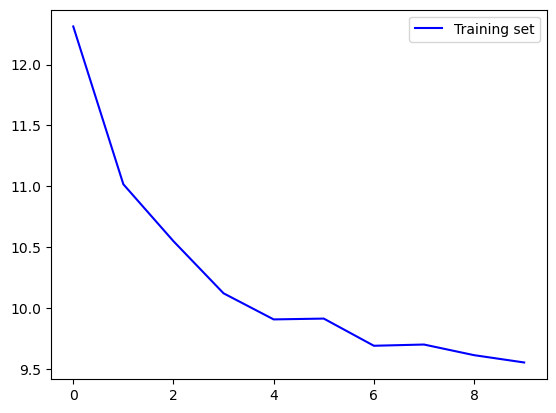

In [27]:
history_model = model_run.history
print("The history has the following data: ", history_model.keys())

# Plotting the training and validation accuracy during the training
sns.lineplot(
    x=model_run.epoch, y=history_model["mean_absolute_error"], color="blue", label="Training set"
)
sns.lineplot(
    x=model_run.epoch,
    y=history_model["val_mean_absolute_error"],
    color="red",
    label="Valdation set",
)
plt.xlabel("epochs")
plt.ylabel("accuracy")

In [ ]:
cp_dir = checkpoints_folder + 'model_epoch_04.weights.h5'

model.load_weights(cp_dir)

# Evaluating the model on test dataset
model.evaluate(X_test_2d, coords_test)

In [ ]:
random_sample = np.random.randint(0, X_test_2d.shape[0])

image = X_test_2d[random_sample]
actual = coords_test[random_sample]
prediction = model.predict(X_test_2d[random_sample].reshape(1, 128, 128, 1))

plt.imshow(image, cmap='gray')
#add dots to predicted values
plt.scatter(prediction[0][0], prediction[0][1], color='red')
plt.scatter(actual[0], actual[1], color='green')
#add legend
plt.legend(['Predicted', 'Actual'])
plt.title(f"Predicted: {prediction.round()}, Actual: {actual}")
plt.show()